Data Science Fundamentals: R |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 17. [Exploratory Data Analysis Using Models](./00.ipynb) | [Model Basics](./01.ipynb) | [Model Building](./02.ipynb) | [Exercises](./03.ipynb)

# Model Building with R

![images](images/slides15.png)

## Diamond Dataset

In [6]:
install.packages("hexbin")

package 'hexbin' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'hexbin'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\aguan\anaconda3\Lib\R\library\00LOCK\hexbin\libs\x64\hexbin.dll to C:\Users\aguan\anaconda3\Lib\R\library\hexbin\libs\x64\hexbin.dll: Permission denied"Warning message:
"restored 'hexbin'"


The downloaded binary packages are in
	C:\Users\aguan\AppData\Local\Temp\RtmpM7A3M7\downloaded_packages


In [7]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [8]:
library(nycflights13)
library(hexbin)
library(lubridate)

Warning message:
"package 'nycflights13' was built under R version 3.6.3"Warning message:
"package 'hexbin' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



In [9]:
library(ggplot2)

It looks like lower quality diamonds have higher prices because there is an important confounding variable: the weight (carat) of the diamond. The weight of the diamond is the single most important factor for determining the price of the diamond, and lower quality diamonds tend to be larger.

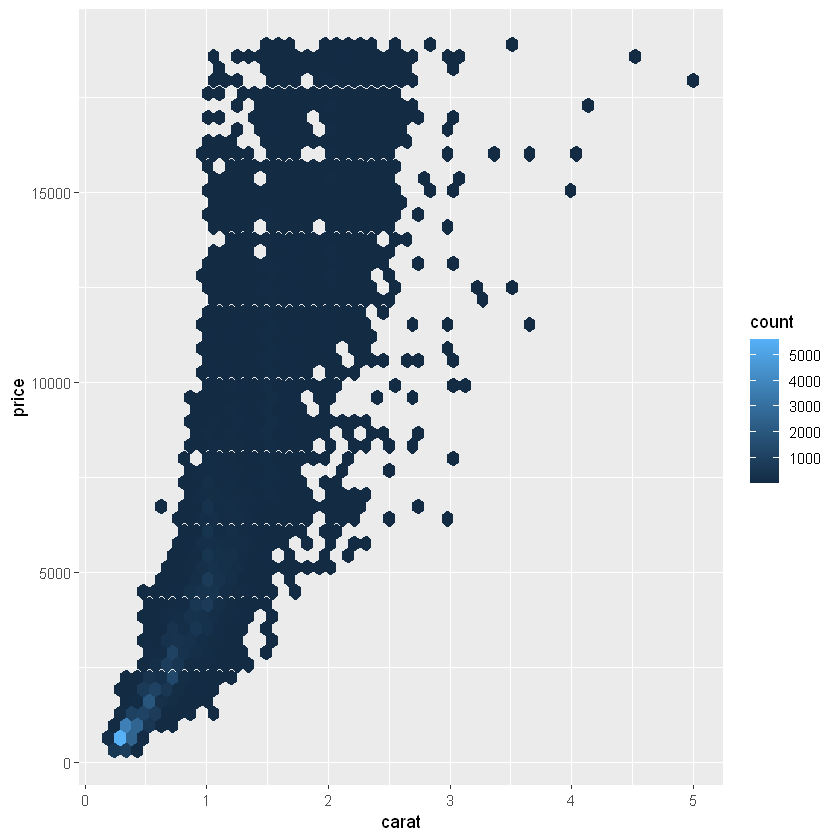

In [10]:
ggplot(diamonds, aes(carat, price)) + 
  geom_hex(bins = 50)

### Why are lower quality diamonds more expensive? 

a surprising relationship between the quality of diamonds and their price: low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices.

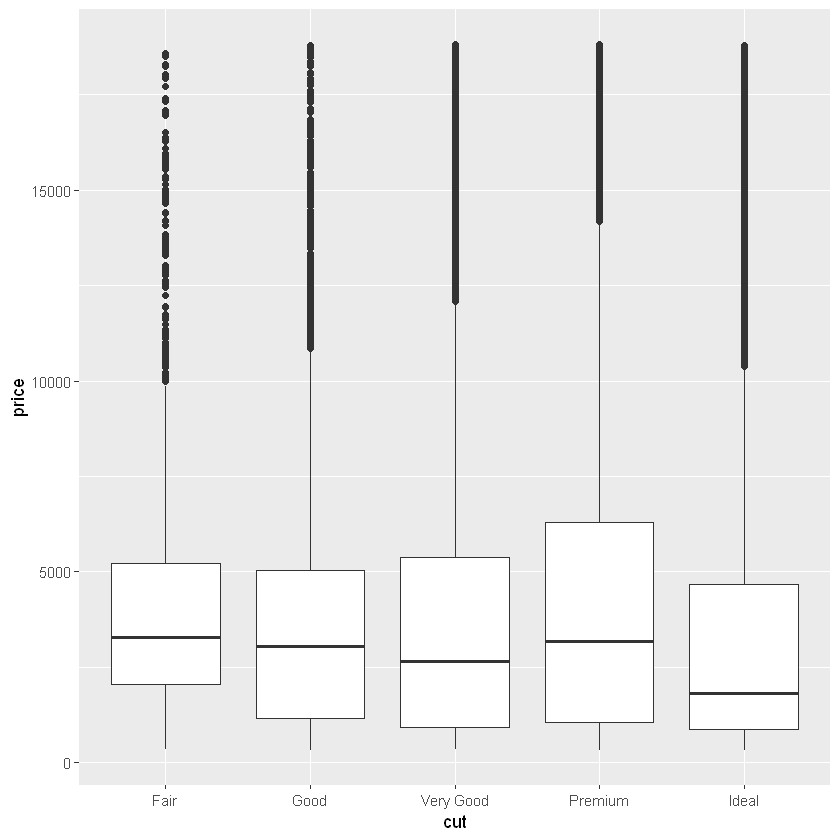

In [11]:
ggplot(diamonds, aes(cut, price)) + geom_boxplot()

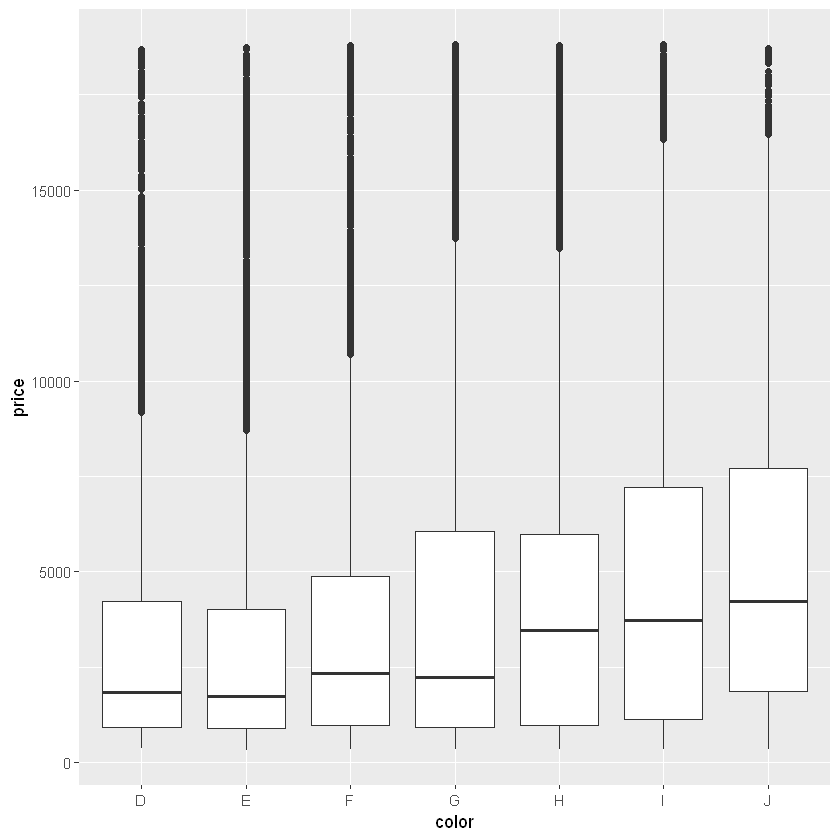

In [12]:
ggplot(diamonds, aes(color, price)) + geom_boxplot()

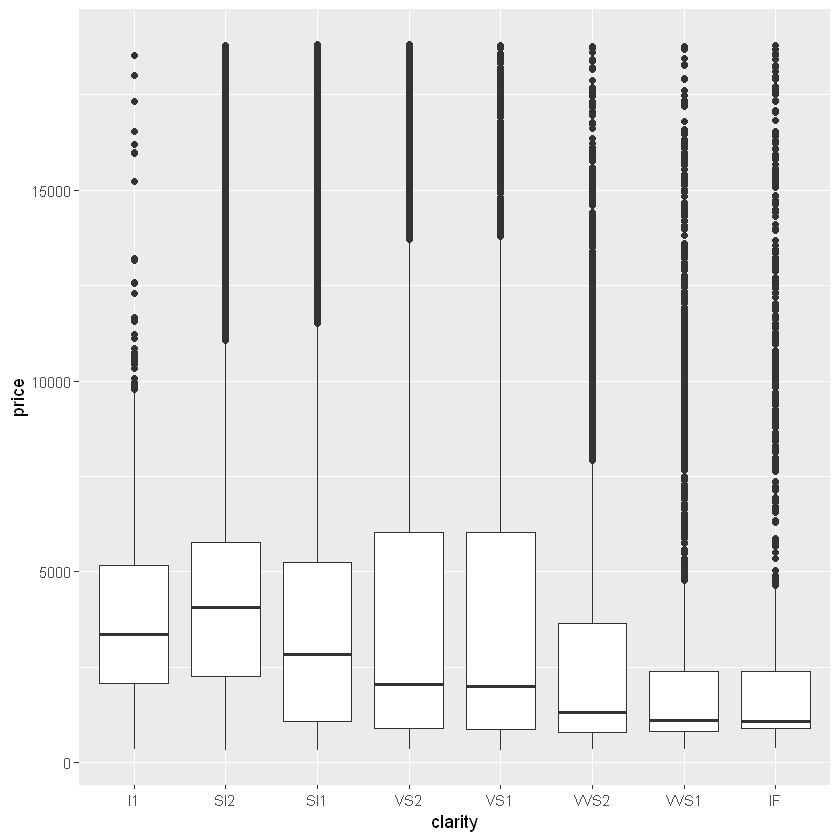

In [13]:
ggplot(diamonds, aes(clarity, price)) + geom_boxplot()

Remember that diamond color goes from J (worst) to D (best).

## Patterns and Models

It is hard to understand the relationship between cut and price.  Use a model to remove the very strong relationship between price and carat.

## Residuals

Residuals are the differences between the true and predicted price.

Once you've removed the strong relationship between carat and price, you can see what you expect in the relationship between cut and price:  relative to their size, better quality diamonds are more expensive.

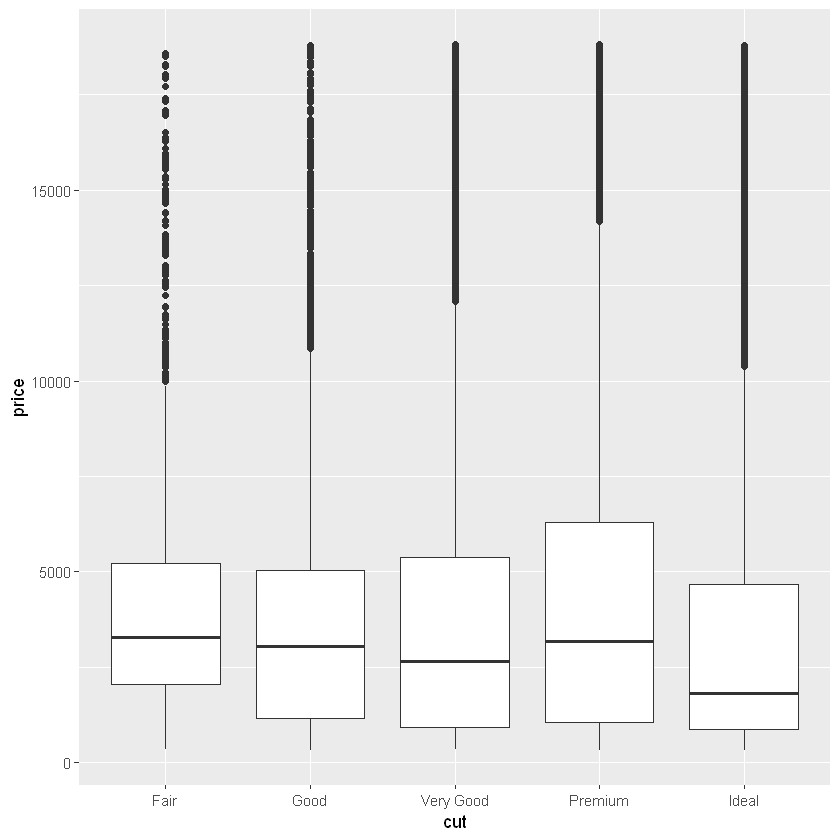

In [18]:
ggplot(diamonds) + 
  geom_boxplot(aes(x=cut, y=price))

## Price and Carat

Focus on diamonds smaller than 2.5 carats (99.7% of the data).

### A More Complicated Model

This model now includes four predictors, so it's getting harder to visualize.  Since there are no interaction terms: plot them individually in four plots.   For example, we can plot the effect of "cut" with others fixed.

In [27]:
library(magrittr)
library(dplyr)

- - -
## Hands-On Exercises

In [ ]:
library(tidyverse)

In [ ]:
library(nycflights13)

In [ ]:
library(lubridate)

In [ ]:
flights

### What affects the number of daily flights?

Create a new date variable.  

In [35]:
daily <- flights %>%
  mutate(date = make_date(year, month, day))
daily %>% select(date, everything())

date,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013-01-01,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013-01-01,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013-01-01,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013-01-01,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013-01-01,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013-01-01,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


## Hands-On Exercise 1.

![images](images/handson1.png)

In [36]:
# hands on exercise 1

daily <- flights %>% 
  mutate(date = make_date(year, month, day)) %>% 
  group_by(date) %>% 
  summarise(n = n())
daily

date,n
2013-01-01,842
2013-01-02,943
2013-01-03,914
2013-01-04,915
2013-01-05,720
2013-01-06,832
2013-01-07,933
2013-01-08,899
2013-01-09,902
2013-01-10,932


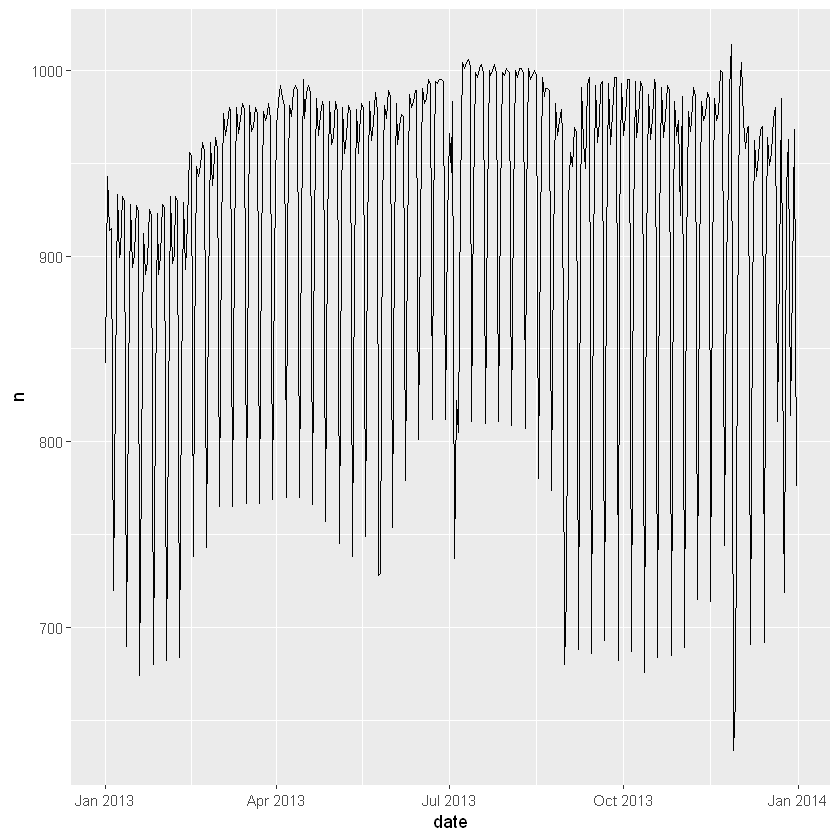

In [39]:
ggplot(daily, aes(date, n)) + 
  geom_line()

## Hands-On Exercise 2.

![images](images/handson2.png)

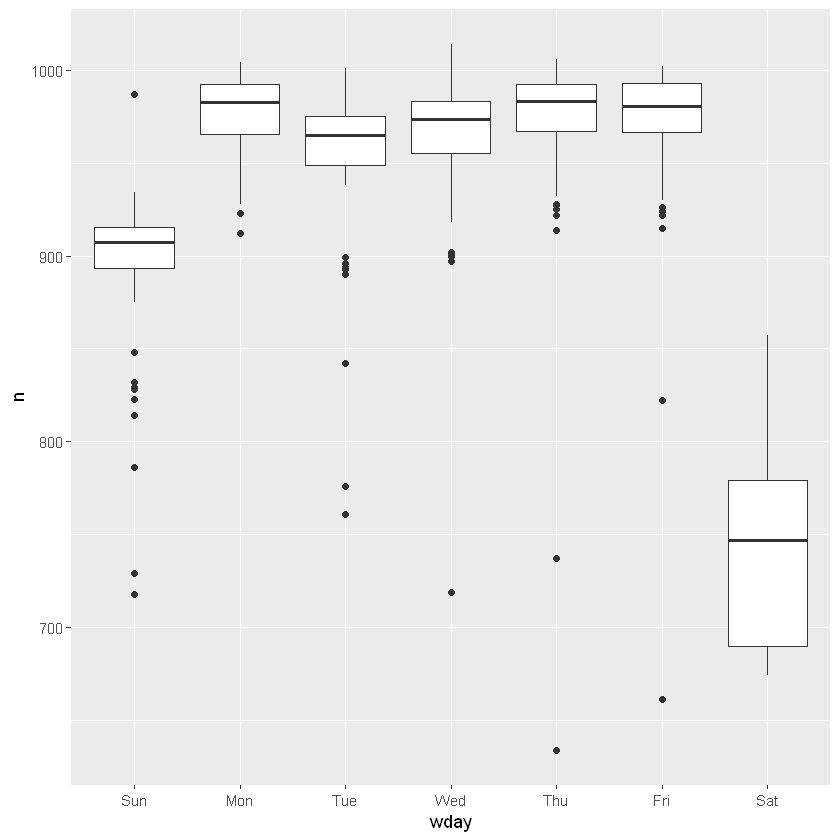

In [38]:
# hands on exercise 2
daily <- daily %>% 
  mutate(wday = wday(date, label = TRUE))
ggplot(daily, aes(wday, n)) + 
  geom_boxplot()

## Hands-On Exercise 3.

![images](images/handson3.png)

![images](images/handson4.png)

In [ ]:
# hands on exercises 4
daily <- daily %>% 
  add_residuals(mod)
daily %>% 
  ggplot(aes(date, resid)) + 
  geom_ref_line(h = 0) + 
  geom_line()

## Hands-On Exercises 5.

![images](images/handson5.png)

In [ ]:
ggplot(daily, aes(date, resid, color = wday)) +
  geom_ref_line(h = 0) + geom_line()

In [ ]:
# hands on exercises 5

## Hands-On Exercises 6.

![images](images/handson6.png)

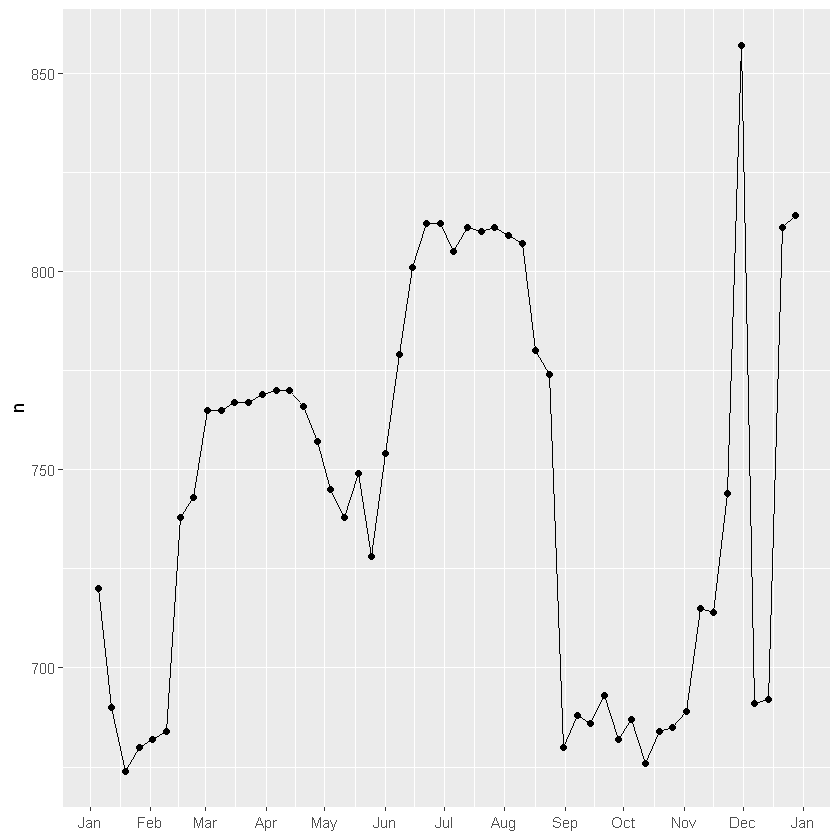

In [41]:
# hands on exercises 6
daily %>% 
  filter(wday == "Sat") %>% 
  ggplot(aes(date, n)) + 
    geom_point() + 
    geom_line() +
    scale_x_date(NULL, date_breaks = "1 month", date_labels = "%b")

## Hands-On Exercises 7

![images](images/handson7.png)

In [43]:
daily <- daily %>%
  mutate(term = cut(date,
                   breaks = ymd("2013-01-01", "2013-06-05", "2013-08-25", "2014-01-01"),
                   labels = c("spring", "summer", "fall")))

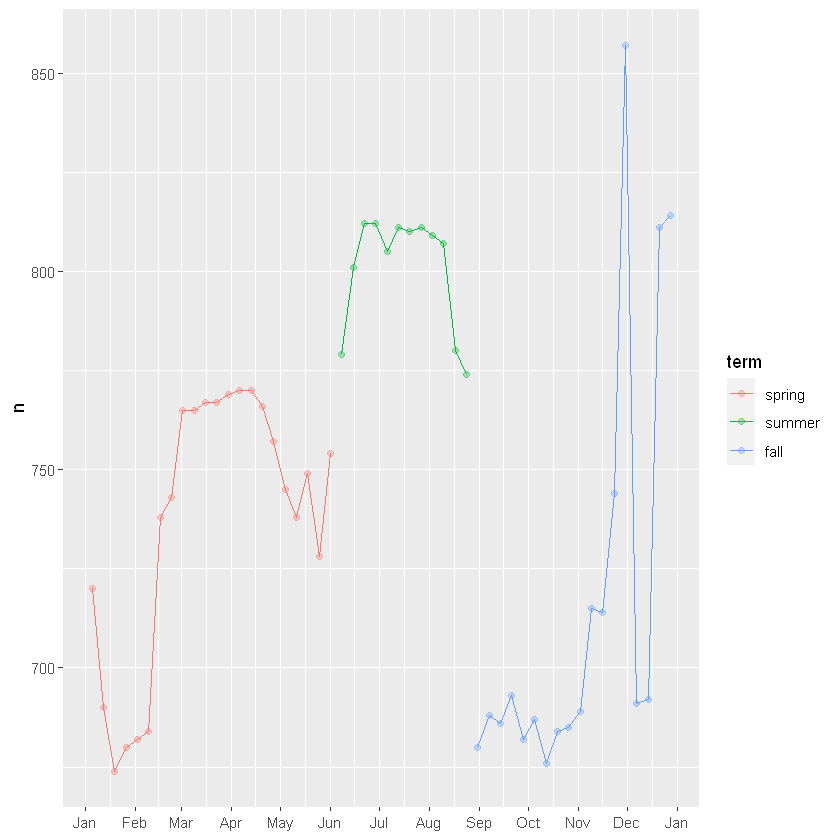

In [44]:
# exercise 7

daily %>% 
  filter(wday == "Sat") %>% 
  ggplot(aes(date, n, colour = term)) +
  geom_point(alpha = 1/3) + 
  geom_line() +
  scale_x_date(NULL, date_breaks = "1 month", date_labels = "%b")

## Hands-On Exercises 8

![images](images/handson8.png)

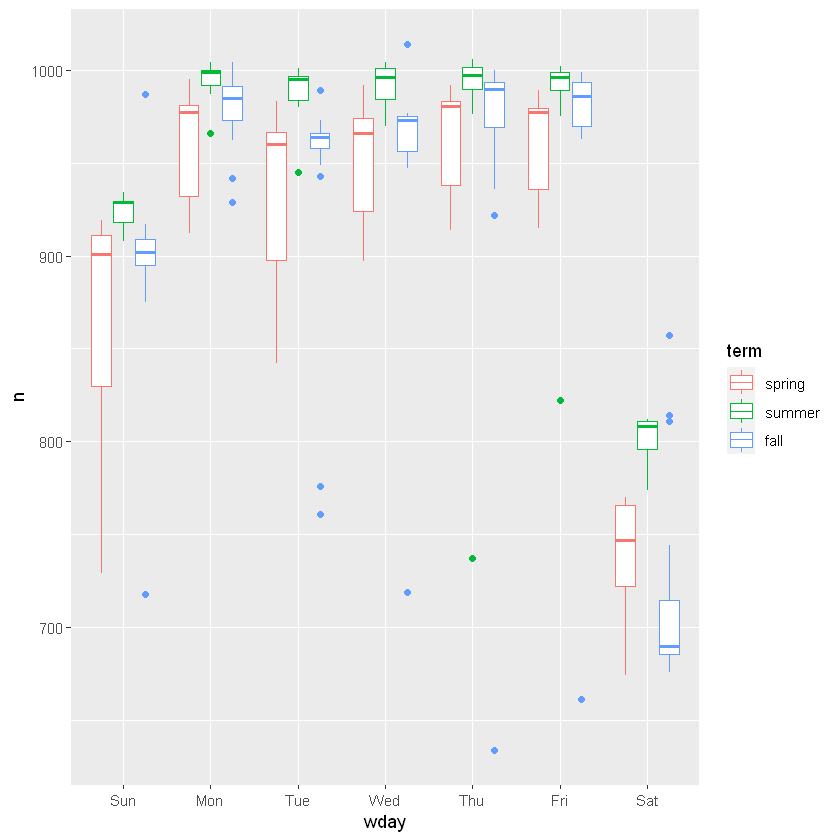

In [45]:
# hands on exercises 8

daily %>% 
  ggplot(aes(wday, n, colour = term)) +
    geom_boxplot()

## Hands-On Exercises 9

![images](images/handson9.png)

![images](images/handson10.png)

Now it is easier to see the long-term trend, and the outliers. 

## Identifying The Outliers

Can we explain the remaining large residuals?

### [John Hopkins University R Exploratory Data Analysis Course](https://www.coursera.org/learn/exploratory-data-analysis?specialization=jhu-data-science)